# 데이터 Feature Engineering

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 데이터 읽어오기

In [3]:
application = pd.read_csv('../data/application_record.csv')
credit = pd.read_csv('../data/credit_record.csv')

In [4]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [5]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
print('application :', len(application['ID']))
print('credit :',len(credit['ID']))
print('intersection :',len(set(application['ID']).intersection(set(credit['ID']))))

application : 438557
credit : 1048575
intersection : 36457


### Application
- ID: Unique identifier for each client.
- CODE_GENDER: Gender of the client.
- FLAG_OWN_CAR: Whether the client owns a car.
- FLAG_OWN_REALTY: Whether the client owns property.
- CNT_CHILDREN: The number of children the client has.
- AMT_INCOME_TOTAL: The total annual income of the client.
- NAME_INCOME_TYPE: The category of the client's income source.
- NAME_EDUCATION_TYPE: The highest education level the client has achieved.
- NAME_FAMILY_STATUS: The marital status of the client.
- NAME_HOUSING_TYPE: The client's living situation.
- DAYS_BIRTH: The client's age in days, counted backwards from the current day.
- DAYS_EMPLOYED: How long the client has been employed, counted backwards from the current day. Positive numbers indicate unemployment.
- FLAG_MOBIL: Whether the client owns a mobile phone.
- FLAG_WORK_PHONE: Whether the client has a work phone.
- FLAG_PHONE: Whether the client has a phone.
- FLAG_EMAIL: Whether the client has an email address.
- OCCUPATION_TYPE: The client's occupation.
- CNT_FAM_MEMBERS: The size of the client's family.

### Credit
- ID: Unique identifier for each client, matching the ID in the application_record.csv.
- MONTHS_BALANCE: The month of the record relative to the current month (0 is current, -1 is previous month, etc.).
- STATUS: The status of the client's credit for that month (e.g., no overdue, days past due, paid off).

In [7]:
merge_df = pd.merge(application, credit, on='ID', how='left')

### Data Shape

In [8]:
print('Application Record data shape: ',application.shape)
print('Credit Record data shape: ',credit.shape)
print('Merged data shape: ', merge_df.shape)

Application Record data shape:  (438557, 18)
Credit Record data shape:  (1048575, 3)
Merged data shape:  (1179815, 20)


### Check Null Values

In [9]:
merge_df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

### Check Duplicated Values

In [10]:
merge_df.duplicated().sum()

0

In [11]:
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C


### Data Info

In [12]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

### Label Mapping

In [13]:
mapping = {'Y': 1, 'N': 0}
merge_df['CODE_GENDER'] = merge_df['CODE_GENDER'].map({'M': 1, 'F': 0})
merge_df['FLAG_OWN_CAR'] = merge_df['FLAG_OWN_CAR'].map(mapping)
merge_df['FLAG_OWN_REALTY'] = merge_df['FLAG_OWN_REALTY'].map(mapping)
application['CODE_GENDER'] = application['CODE_GENDER'].map({'M': 1, 'F': 0})
application['FLAG_OWN_CAR'] = application['FLAG_OWN_CAR'].map(mapping)
application['FLAG_OWN_REALTY'] = application['FLAG_OWN_REALTY'].map(mapping)

In [14]:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1179815.0,5.429449e+06,574822.791061,5008804.0,5061203.0,5115961.0,5769825.5,7999952.0
CODE_GENDER,1179815.0,3.313689e-01,0.470706,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,1179815.0,3.844798e-01,0.486472,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,1179815.0,6.717290e-01,0.469584,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,1179815.0,4.277560e-01,0.738171,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,1179815.0,1.882163e+05,104844.453399,26100.0,121500.0,162000.0,225000.0,6750000.0
DAYS_BIRTH,1179815.0,-1.608234e+04,4131.929778,-25201.0,-19473.0,-15711.0,-12646.0,-7489.0
DAYS_EMPLOYED,1179815.0,5.876616e+04,137300.020010,-17531.0,-3242.0,-1617.0,-412.0,365243.0
FLAG_MOBIL,1179815.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,1179815.0,2.224645e-01,0.415902,0.0,0.0,0.0,0.0,1.0


### Correlations

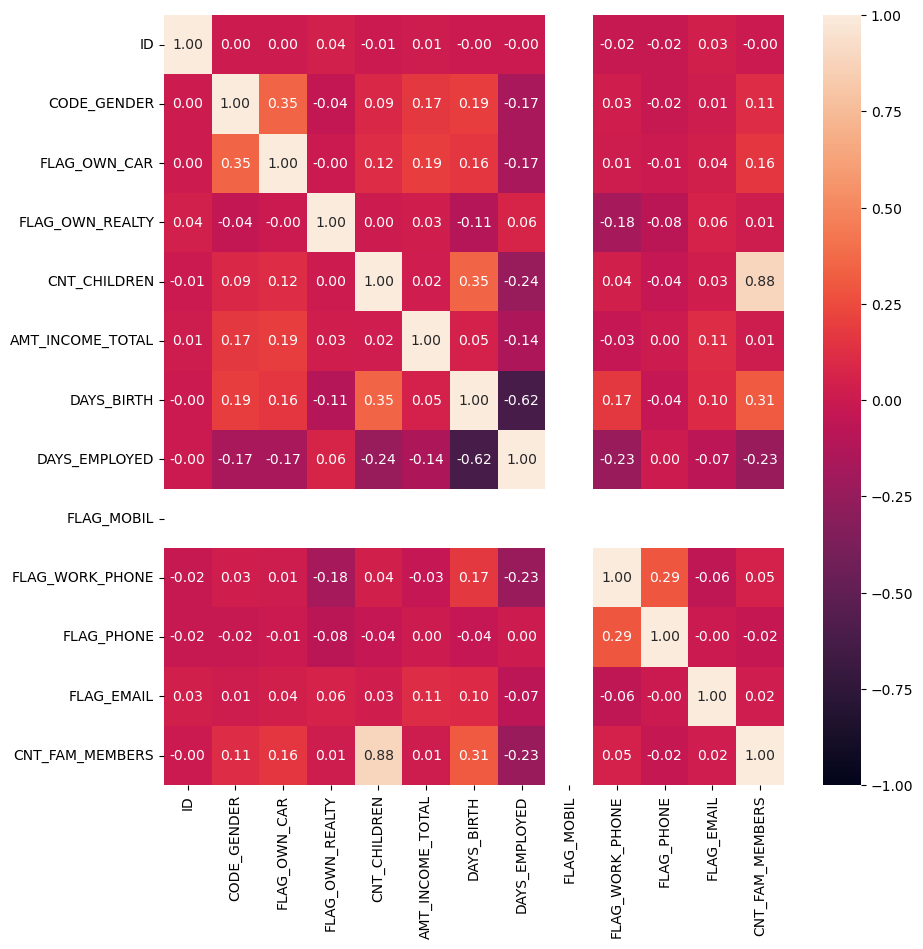

In [15]:
numerical_columns = application.select_dtypes('number').columns
numerical_columns_df = merge_df.select_dtypes('number').columns
plt.figure(figsize=(10, 10))
sns.heatmap(application[numerical_columns].corr(), cmap='rocket', fmt='.2f', annot=True, vmin=-1, vmax=1);

### Gender Distribution

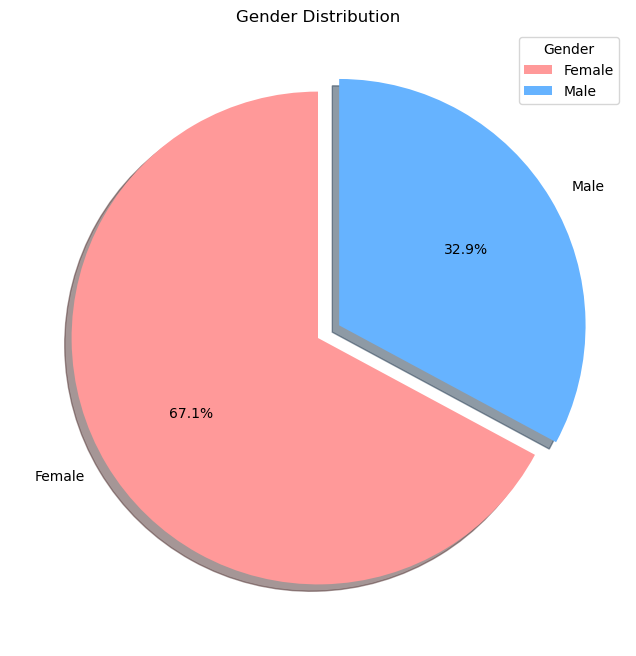

In [16]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)
plt.pie(x=application['CODE_GENDER'].value_counts().values, labels=['Female', 'Male'],
        autopct='%.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
plt.legend(title='Gender', loc='upper right')
plt.title('Gender Distribution')
plt.show()

-> 카드 신청자는 Female이 약 2배이다.

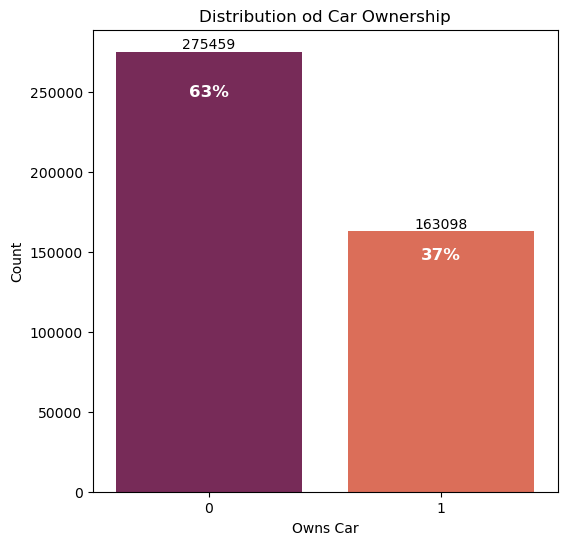

In [17]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=application, y= application['FLAG_OWN_CAR'].value_counts().values, x=application['FLAG_OWN_CAR'].value_counts().index, palette='rocket')
total = len(application)
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.0%}',
                (p.get_x() + p.get_width() / 2, height / 1.1),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    
ax.set_xlabel('Owns Car')
ax.set_ylabel('Count')

ax.set_title('Distribution od Car Ownership')

plt.show()

-> 차 소유 여부는 '소유하지 않은' 사람이 '소유한' 사람의 약 2배이다.

### Number of Children Distribution

In [18]:
merge_df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     819509
1     236673
2     107027
3      14339
4       1647
5        437
14       111
7         53
19         6
9          5
12         4
6          4
Name: count, dtype: int64

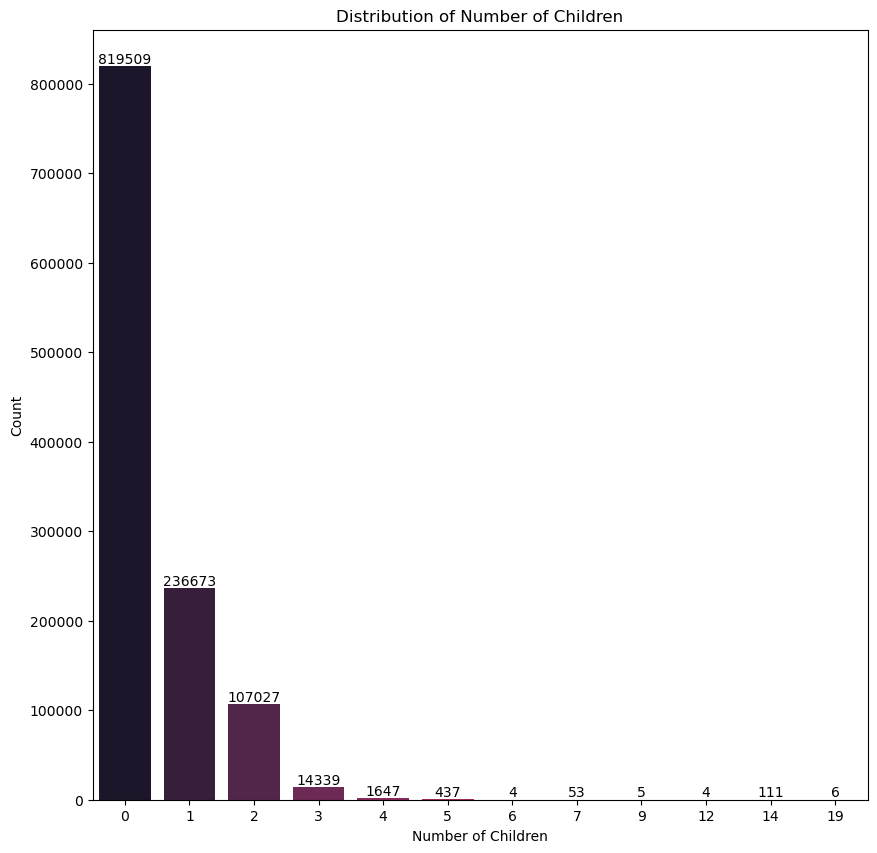

In [19]:
num = merge_df['CNT_CHILDREN'].value_counts().values
label = merge_df['CNT_CHILDREN'].value_counts().index
total = len(application)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=merge_df, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of Children")

# Add a title
ax.set_title("Distribution of Number of Children")

plt.show()

-> 자식이 없는 사람이 가장 많이 차지하고 있다.

### Income Distribution

In [20]:
merge_df['AMT_INCOME_TOTAL'].value_counts()

AMT_INCOME_TOTAL
135000.0    132787
180000.0    103394
157500.0     99365
112500.0     95645
225000.0     92603
             ...  
45450.0          1
187497.0         1
116550.0         1
128646.0         1
132075.0         1
Name: count, Length: 866, dtype: int64

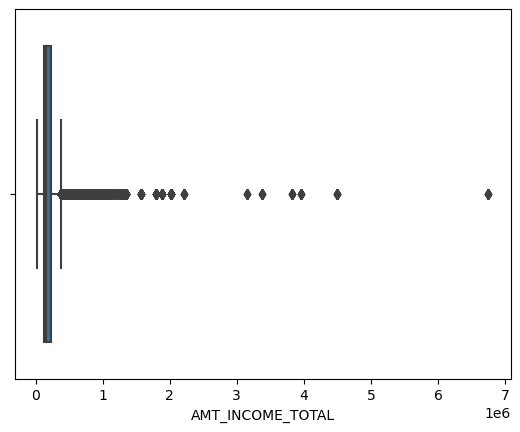

In [21]:
sns.boxplot(x = 'AMT_INCOME_TOTAL', data=application);

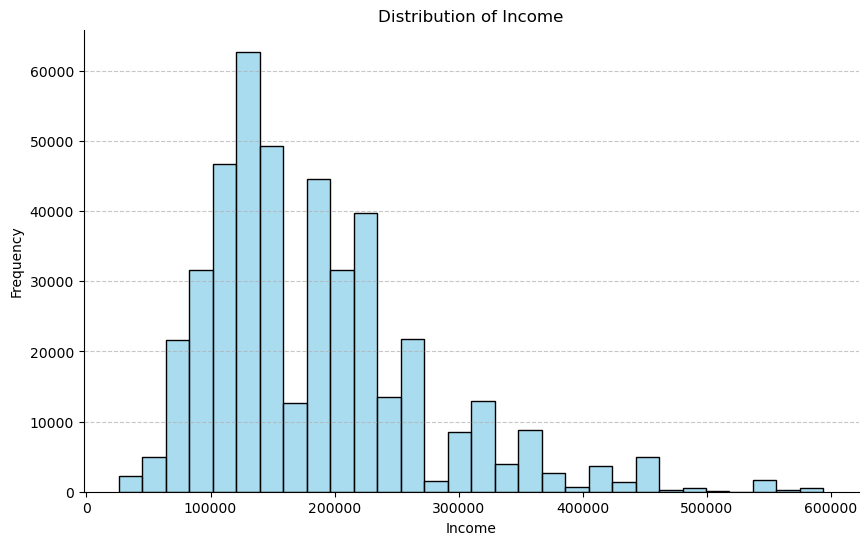

In [56]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=application[application['AMT_INCOME_TOTAL'] <= 600000], x='AMT_INCOME_TOTAL', bins=30,
                 color='skyblue', edgecolor='black', alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

의문점
- 왜 600,000을 기준으로 데이터를 정했는가?
- 그럼 600,000을 넘는 데이터는 삭제해도 괜찮은가?


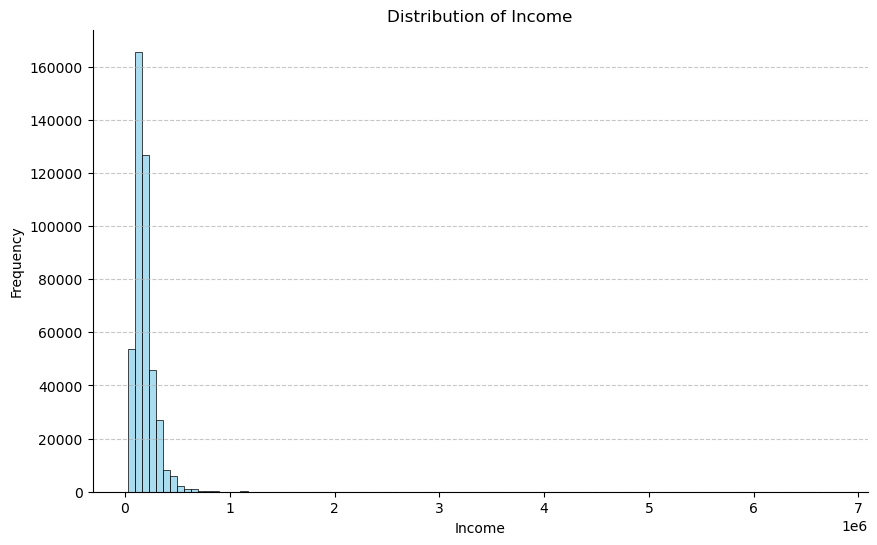

In [27]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=application[application['AMT_INCOME_TOTAL'] <= 6750000], x='AMT_INCOME_TOTAL', bins=100,
                 color='skyblue', edgecolor='black', alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### Occupation Type Distribution

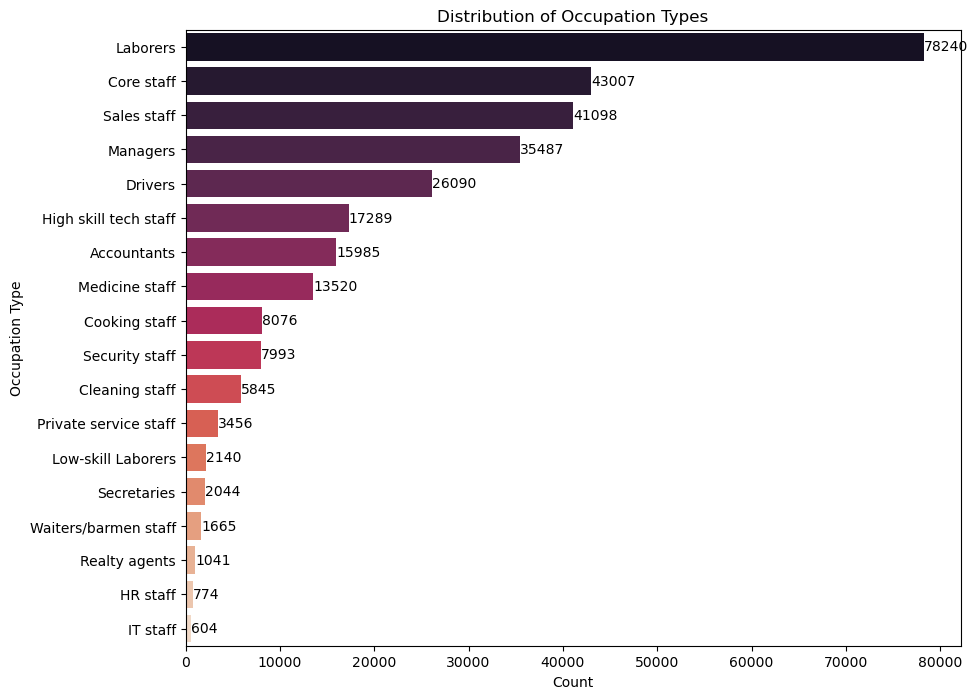

In [24]:
plt.figure(figsize=(10, 8))

sns.barplot(data=application,
            y=application['OCCUPATION_TYPE'].value_counts().index,
            x=application['OCCUPATION_TYPE'].value_counts().values,
            palette='rocket')

ax = plt.gca()
for i, v in enumerate(application['OCCUPATION_TYPE'].value_counts().values):
    ax.text(v , i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.title('Distribution of Occupation Types')

plt.show()

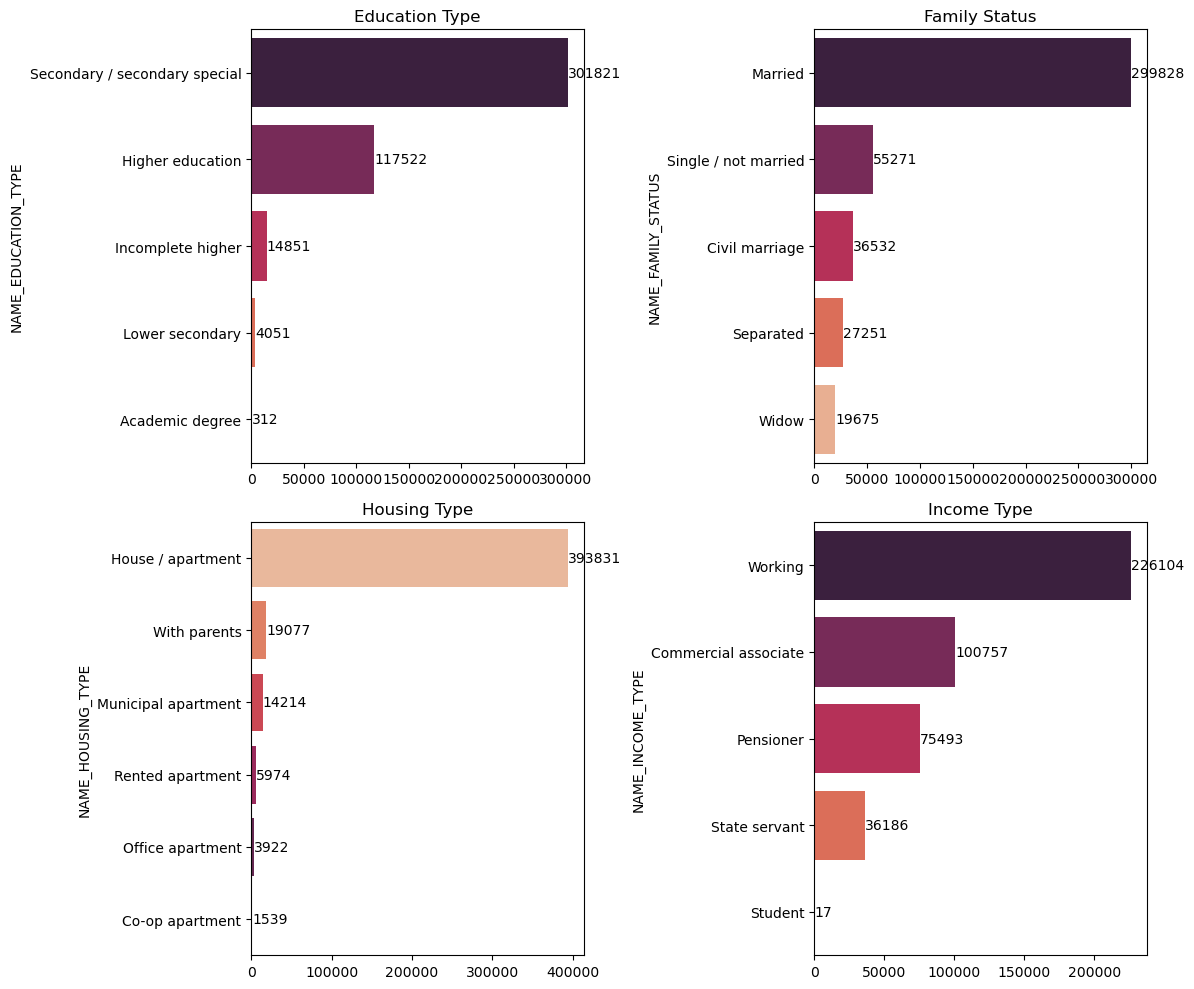

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(data=application, x=application['NAME_EDUCATION_TYPE'].value_counts().values, 
            y=application['NAME_EDUCATION_TYPE'].value_counts().index, ax=ax[0, 0],palette='rocket')

for i, v in enumerate(application['NAME_EDUCATION_TYPE'].value_counts().values):
    ax[0, 0].text(v , i, str(v), color='black', va='center')

ax[0, 0].set_title('Education Type')

sns.barplot(data=application, x=application['NAME_FAMILY_STATUS'].value_counts().values, 
            y=application['NAME_FAMILY_STATUS'].value_counts().index, ax=ax[0, 1],palette='rocket')

for i, v in enumerate(application['NAME_FAMILY_STATUS'].value_counts().values):
    ax[0, 1].text(v , i, str(v), color='black', va='center')

ax[0, 1].set_title('Family Status')

sns.barplot(data=application, x=application['NAME_HOUSING_TYPE'].value_counts().values, 
            y=application['NAME_HOUSING_TYPE'].value_counts().index, ax=ax[1, 0],palette='rocket_r')

for i, v in enumerate(application['NAME_HOUSING_TYPE'].value_counts().values):
    ax[1, 0].text(v , i, str(v), color='black', va='center')

ax[1, 0].set_title('Housing Type')

sns.barplot(data=application, x=application['NAME_INCOME_TYPE'].value_counts().values, 
            y=application['NAME_INCOME_TYPE'].value_counts().index, ax=ax[1, 1],palette='rocket')

for i, v in enumerate(application['NAME_INCOME_TYPE'].value_counts().values):
    ax[1, 1].text(v , i, str(v), color='black', va='center')
    
ax[1, 1].set_title('Income Type')

plt.tight_layout()
plt.show()

In [29]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [57]:
status_point = {'0': 20, '1': 10, '2': 1, '3': -1, '4': -10, '5': -20, 'C': 30, 'X': 0}

credit['Point'] = credit['STATUS'].map(status_point)
scores = credit.groupby('ID')['Point'].sum()

scores_df = scores.reset_index(name='Scores')
scores_df

,ID,Scores
0,5001711,60
1,5001712,470
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,420
45981,5150483,0
45982,5150484,270
45983,5150485,40


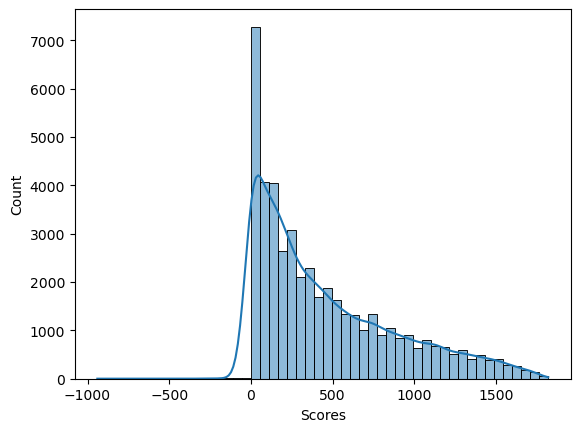

In [58]:
sns.histplot(x=scores_df['Scores'], bins=50, kde=True, fill=True);

In [48]:
len(scores_df)

45985

### 하위 약 30%

In [60]:
print(45985 * 0.3)

13795.5


In [59]:
len(scores_df[scores_df['Scores'] < 100])

10246

하지만 데이터를 합쳤을 때는 다시 확인해봐야 할 것 같다..